## Pattern recognition. Project 1.

In [16]:
import numpy as np
from math import log, exp
from scipy import linalg

### Making plotting more readable

In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace, vstack, zeros, arange, power, abs
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm
import random

# Font which got unicode math stuff.
mpl.rcParams['font.family'] = 'DejaVu Sans'
# Much more readable plots
plt.style.use('ggplot')

In [18]:
class Aitchison:
    """
    common operations in Aitchison geometry here
    """

    def __int__(self):
        pass

    def cal_closure(self, v_x):
        return [i / sum(v_x) for i in v_x]

    # circle plus
    def cal_perturbation(self, v_x, v_y):
        return self.cal_closure([x * y for x, y in zip(v_x, v_y)])

    def cal_inner_product(self, v_x, v_y):
        length = len(v_x)
        ran = range(length)
        return 1.0 / (2.0 * length) * sum([np.log(v_x[i]/v_x[j]) * np.log(v_y[i]/v_y[j]) for i in ran for j in
                                           ran])

    def cal_norm(self, v_x):
        return np.sqrt(self.cal_inner_product(v_x, v_x))

    # circle mutiply
    def cal_powering(self, v_x, a):
        return self.cal_closure([np.power(x, a) for x in v_x])

    def cal_minus(self, v_x, v_y):
        return self.cal_perturbation(v_x, self.cal_powering(v_y, -1))

    def cal_distance(self, v_x, v_y):
        return self.cal_norm(self.cal_minus(v_x, v_y))

In [19]:
def plot_data_2d(X, task, distribution, filename=None, labels=None):
    """Create a 2D plot, with legend
    """

    # create a figure and its axes
    fig = plt.figure()
    axs = fig.add_subplot(111)

    if task == str(3):
        axs.plot(X[0, :], X[1, :], 'k-', label='data')
        axs.plot(distribution, color='red')
    elif task == str(1):
        axs.plot(X[0, :], X[1, :], 'ro', label='data')
    else:
        raise ValueError('The value of "task" should be 1 or 3.')

    # set x and y limits of the plotting area
    x_min = X[0, :].min()
    x_max = X[0, :].max()
    axs.set_xlim(x_min-10, x_max+10)
    axs.set_ylim(-2, X[1, :].max()+10)

    # set properties of the legend of the plot
    leg = axs.legend(loc='upper left', shadow=True, fancybox=True, numpoints=1)
    leg.get_frame().set_alpha(0.5)

    # either show figure on screen or write it to disk
    if filename is None:
        if 'HW' in labels:
            plt.xlabel('Height(m)')
            plt.ylabel('Weight(kg)')
        elif 'WH' in labels:
            plt.xlabel('Weight(kg)')
            plt.ylabel('Height(m)')
        else:
            plt.xlabel('Observations')
            plt.ylabel('H')
        plt.show()
    else:
        plt.savefig(filename, facecolor='w', edgecolor='w',
                    papertype=None, format='pdf', transparent=False,
                    bbox_inches='tight', pad_inches=0.1)
    plt.close()

def plot_data_density(X, filename=None):

    # fit a normal distribution to the data
    mean, std = norm.fit(X)

    # create a figure with fixed size, and its axes
    fig1 = plt.figure(1, figsize=(5, 5))
    axs = fig1.add_subplot(111)

    # plot the pdf
    x = linspace(140, 210, 100)
    p = norm.pdf(x, mean, std)
    axs.plot(x, p, 'k', linewidth=2, color='y')
    title = "Fit Results: mean = %.2f,  std = %.2f" % (mean, std)
    plt.title(title)

    # plot the actual data, set y=0 for all points
    X = vstack((X, zeros(len(X))))
    axs.plot(X[0, :], X[1, :], 'ro', label='data', color='blue')

    # add legend
    plt.plot([], label="normal", color="yellow")
    f2 = axs.legend(loc=1, shadow=True, fancybox=True, numpoints=1)
    f2.get_frame().set_alpha(0.5)
    
    # either show figure on screen or write it to disk
    if filename is None:
        plt.show()
    else:
        fig1.savefig(filename, facecolor='w', edgecolor='w',
                    papertype=None, format='pdf', transparent=False,
                    bbox_inches='tight', pad_inches=0.1)

    plt.close()


def plot_circle(self, filename, p_value):
    """Plot circle by solving the circle function:
        |x|^p + |y|^p = 1
        |y|^p = 1 - |x|^p
    """
    x = arange(-1.0, 1.0, 0.0000001)
    y_1 = power((1 - power(abs(x), p_value)), 1/float(p_value))
    y_2 = -y_1

    fig = plt.gcf()
    title = "p value is: %.2f" % p_value
    plt.title(title)

    plt.plot(x, y_1, color='blue')
    plt.plot(x, y_2, color='blue')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show(filename)

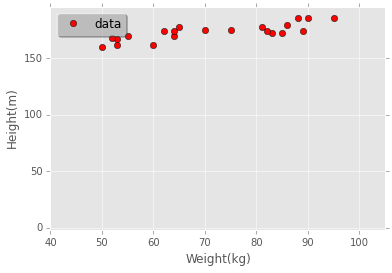

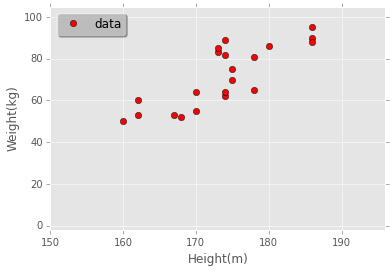

In [20]:
"""
read weight, height and gender information from file, and plot weight against height
"""
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('resources/whData.dat', dtype=dt, comments='#', delimiter=None)

# read weight, height, and gender information into 1D arrays
ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])

# remove data with negative value
hs = np.delete(hs, np.where(ws < 0), None)
ws = np.delete(ws, np.where(ws < 0), None)

x_matrix = np.vstack((ws, hs))
plot_data_2d(x_matrix, '1', '', labels='WH')

x_matrix = x_matrix.transpose()
# exchange first and second columns
x_matrix[:, [0, 1]] = x_matrix[:, [1, 0]]
plot_data_2d(x_matrix.transpose(), '1', '', labels='HW')

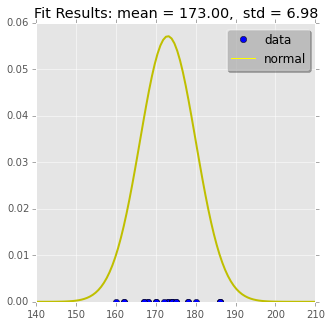

In [21]:
"""
read weight, height and gender information from file, and plot weight against height
"""
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('resources/whData.dat', dtype=dt, comments='#', delimiter=None)

# read height size information into 1D arrays
hs = np.array([d[1] for d in data])

# plot and write to disk
plot_data_density(hs)

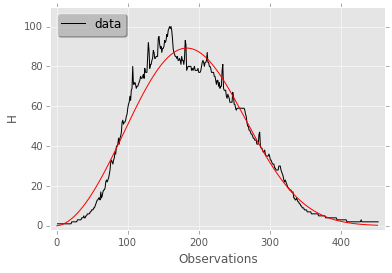

In [22]:
"""
read weight, height and gender information from file, and plot weight against height
"""
dt = np.dtype([('date', np.str_, 24), ('queries', np.int)])
data = np.loadtxt('resources/myspace.csv', dtype=dt, comments='#', delimiter=',')

# read queries information into 1D array
raw = [d[1] for d in data if d[1] != 0]
x_raw = [i+1 for i in range(len(raw))]

N = sum(raw)

epochs = range(20)
arr = np.mat([1.0, 1.0]).T
for e in epochs:
    k = arr[0, 0]
    a = arr[1, 0]

    sldatok = sum([h * np.power((x / a), k) * log(x / a) for h, x in zip(raw, x_raw)])
    sdatok = sum([h * np.power((x / a), k) for h, x in zip(raw, x_raw)])
    sd2ldk2 = sum([h * np.power((x / a), k) * pow(log(x / a), 2) for h, x in zip(raw, x_raw)])
    slogd = sum([h * log(x) for h, x in zip(raw, x_raw)])

    dldk = N/k - N*log(a) + slogd - sldatok
    dlda = (k/a)*(sdatok-N)
    d2ldk2 = -N/(k*k) - sd2ldk2
    d2lda2 = (k/(a*a))*(N-(k+1)*sdatok)
    d2ldkda = (1/a)*sdatok + (k/a)*sldatok - N/a

    hessian = np.mat([[d2ldk2, d2ldkda], [d2ldkda, d2lda2]])
    gr = np.mat([-dldk, -dlda]).T
    arr = arr + np.dot(linalg.inv(hessian), gr)

#distribution scaled by N
distribution = [(N*(k/a * pow(el/a, k-1) * (exp(-pow(el/a, k))))) for el in x_raw]

# plot and write to disk
x_matrix = np.vstack((x_raw, raw))
plot_data_2d(x_matrix, '3', distribution, labels='')

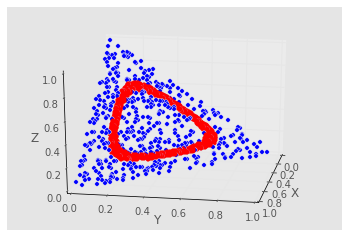

In [23]:
STEP = 0.01

x = y = z = arange(0.0, 1.0, STEP)
points = [(a, b, c) for a in x for b in y for c in z if (a + b + c == 1) and a > 0 and b > 0 and c > 0]
circle_points = [el for el in points if abs(Aitchison().cal_distance(el, (1.0/3.0, 1.0/3.0, 1.0/3.0)) - 1) <
                 0.1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points = random.sample(points, 500)

for x, y, z in points:
    ax.scatter(x, y, z)
    #ax.scatter(x, y)    # project to 2d

for x, y, z in circle_points:
    # ax.scatter(x, y, color='red')   # project to 2d
    ax.scatter(x, y, z, color='red')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=10)
plt.show()